#1. Connexion au drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Lecture du dataframe 

In [ ]:
#Lecture du fichier csv
import pandas as pd
df_audio = pd.read_csv('/content/drive/MyDrive/Projet Non-Alternants AED 2021/DATA/AUDIO/df_audio.csv')

In [ ]:
df_audio.head()

,duree,zrc,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,id,rating
0,148.607750,226345.0,3085.495886,5986.610685,-98.231995,37.471394,-42.313953,-23.037893,-35.917725,-21.154766,-25.531017,-17.526449,-18.862604,-12.678902,-15.215623,-6.590576,-6.783550,1341,2.866841
1,101.703500,165611.0,3441.622458,7129.196639,-34.139572,54.185520,-0.436810,4.506167,-7.122158,0.009030,-6.883800,-8.948134,-13.295561,-6.596420,-9.484797,-2.844001,-7.826204,1405,2.967150
2,142.175875,96657.0,1992.086251,4287.249113,-146.228333,92.757355,5.222880,26.853729,5.794054,10.664813,2.643010,3.774183,-0.647875,0.890524,-4.156791,1.616906,-4.355479,105954,3.494819
3,147.261000,183169.0,2985.427190,6160.049554,-137.687851,67.028183,-9.572527,-1.992519,-9.117128,-0.648659,-7.531102,-4.302991,-13.316188,-5.421843,-4.864212,-3.016084,-6.592301,102905,3.110000
4,90.720375,84527.0,2274.858012,4695.901106,-130.235809,82.808762,-3.236480,12.612826,-2.946570,9.786930,-2.886461,0.509199,-6.269305,2.207209,-1.120280,0.000745,-8.284515,114935,3.657233


In [ ]:
# #Import
import pandas as pd # Pour le dataframe
import numpy as np # Pour la normalisation et calculs de moyenne
import time #utiliser pour savoir le temps de calcul pour l'importance des features
import matplotlib.pyplot as plt # Pour la visualisation

# from PIL import Image

# import librosa # Pour l'extraction des features et la lecture des fichiers wav
# import librosa.display # Pour récupérer les spectrogrammes des audio
# import librosa.feature

# import os # C'est ce qui va nous permettre d'itérer sur les fichiers de l'environnement de travail

# from sklearn.feature_selection import VarianceThreshold
# from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, RandomizedSearchCV # Split de dataset et optimisation des hyperparamètres
# from sklearn.ensemble import RandomForestClassifier # Random forest
# from sklearn.ensemble import GradientBoostingClassifier # XGBoost
# from sklearn.neighbors import KNeighborsClassifier # k-NN
# from sklearn.svm import SVC # SVM
# from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, zero_one_loss, classification_report # Métriques pour la mesure de performances
from sklearn.preprocessing import normalize, StandardScaler

# import tensorflow as tf # Pour le reseau de neurones simple et pour le CNN

# import seaborn as sns

# #from keras.models import Sequential
# #from keras.layers import Dense
# #from keras.wrappers.scikit_learn import KerasClassifier
# #from keras.optimizers import Adam
# #from keras.utils import to_categorical

# from xgboost import XGBClassifier
# from pprint import pprint


from sklearn.ensemble import RandomForestRegressor

#Régression linéaire
from sklearn.linear_model import LinearRegression

#Calcul de la MSE
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#Pour XGBoost Regressor
# from xgboost.sklearn import XGBRegressor
import xgboost as xgb

#SVR 
from sklearn.svm import SVR
from sklearn import svm
from sklearn.model_selection import GridSearchCV #Recherche des meilleurs paramètres
from sklearn.pipeline import make_pipeline

#Neural Network
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
variances.head()

,duree,zrc,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,148.607750,226345.0,3085.495886,5986.610685,-98.231995,37.471394,-42.313953,-23.037893,-35.917725,-21.154766,-25.531017,-17.526449,-18.862604,-12.678902,-15.215623,-6.590576,-6.783550
1,101.703500,165611.0,3441.622458,7129.196639,-34.139572,54.185520,-0.436810,4.506167,-7.122158,0.009030,-6.883800,-8.948134,-13.295561,-6.596420,-9.484797,-2.844001,-7.826204
2,142.175875,96657.0,1992.086251,4287.249113,-146.228333,92.757355,5.222880,26.853729,5.794054,10.664813,2.643010,3.774183,-0.647875,0.890524,-4.156791,1.616906,-4.355479
3,147.261000,183169.0,2985.427190,6160.049554,-137.687851,67.028183,-9.572527,-1.992519,-9.117128,-0.648659,-7.531102,-4.302991,-13.316188,-5.421843,-4.864212,-3.016084,-6.592301
4,90.720375,84527.0,2274.858012,4695.901106,-130.235809,82.808762,-3.236480,12.612826,-2.946570,9.786930,-2.886461,0.509199,-6.269305,2.207209,-1.120280,0.000745,-8.284515


#3. Corrélation

Text(0.5, -0.15, 'Matrice de corrélation')

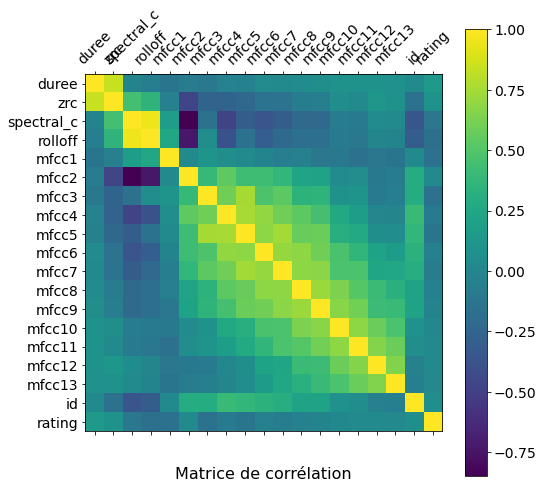

In [ ]:
f = plt.figure(figsize=(8, 8))

plt.matshow(df_audio.corr(), fignum=f.number) #df.corr() permet de calculer les corrélations une à une de vos variables
plt.xticks(range(df_audio.shape[1]), df_audio.columns, fontsize=14, rotation=45)
plt.yticks(range(df_audio.shape[1]), df_audio.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

#4. Entrainement

In [ ]:
# Ne pas changer pour garantir qu'on utilise tous les mêmes ensembles (train et test)
# Fichiers train et test proposés dans le cahier des charges 
train_df = df_audio.sample(frac=0.90, random_state=17)
train_df = df_audio[df_audio['id'].isin(train_df['id'])]
print("La taille de la collection d'entraînement est de",len(train_df),"films")
test_df = df_audio[~df_audio['id'].isin(train_df['id'])]
print("La taille de la collection de test est de",len(test_df),"films")

La taille de la collection d'entraînement est de 7017 films
La taille de la collection de test est de 780 films


In [ ]:
#Création de X_train, X_test, y_train, y_test
X_train = train_df.drop(['rating', 'id'], 1)
X_test = test_df.drop(['rating', 'id'], 1)
y_train = train_df['rating']
y_test = test_df['rating']

In [ ]:
X_train.head(1)

,duree,zrc,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,148.60775,226345.0,3085.495886,5986.610685,-98.231995,37.471394,-42.313953,-23.037893,-35.917725,-21.154766,-25.531017,-17.526449,-18.862604,-12.678902,-15.215623,-6.590576,-6.78355


**Linear regression**

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred1 = regressor.predict(X_test)

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))

Mean Squared Error: 0.2173903436481931


**Random Forest Regressor**

In [ ]:
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred2 = regr.predict(X_test)

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))

Mean Squared Error: 0.2124709696466182


**Recherche des features les plus importantes**

In [ ]:
start_time = time.time()
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.020 seconds


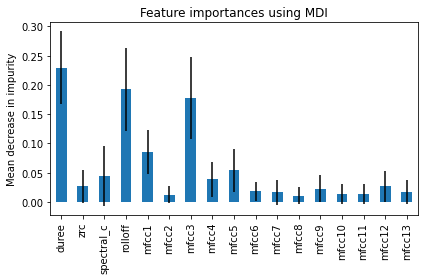

In [ ]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(list(X_train.columns))
fig.tight_layout()

#Les features les plus importantes sont la durée, rolloff, mfcc1 et mfcc3

**XGBoost Regressor**

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [ ]:
y_pred3 = xgbr.predict(X_test)

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))

Mean Squared Error: 0.2106114404995345


**SVR - Support Vector Regression**

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
regrr = SVR(C=0.1, epsilon=0.3)
regrr.fit(X_train, y_train)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.3, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred4 = regrr.predict(X_test)

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))

Mean Squared Error: 0.24194848445542327


**Recherche des meilleurs paramètres pour SVR**

In [ ]:
svc = svm.SVR()

grid = GridSearchCV(estimator=SVR(kernel='rbf'), param_grid={'C': [1.1, 5.4, 170, 1001],'epsilon': [0.0003, 0.007, 0.0109, 0.019, 0.14, 0.05, 8, 0.2, 3, 2, 7], 'gamma': [0.7001, 0.008, 0.001, 3.1, 1, 1.3, 5]},
                    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
X = X_train
y = y_train
grid.fit(X,y)

#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)

best parameters are:  {'C': 170, 'epsilon': 0.0003, 'gamma': 0.008}


**Test du modèle SVR avec les paramètres optimaux**

In [ ]:
regrr = SVR(C=170, epsilon=0.0003, gamma=0.008)
regrr.fit(X_train, y_train)

SVR(C=170, cache_size=200, coef0=0.0, degree=3, epsilon=0.0003, gamma=0.008,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred5 = regrr.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred5))

Mean Squared Error: 0.2431191820794783


**Neural network**

In [ ]:
n_outputs=1
epochs=3000
batch_size=128
verbose=1

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs))
model.compile(loss='mse', optimizer='adam')    
   
hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,verbose=verbose)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
55/55 [==============================] - 0s 4ms/step - loss: 0.7635
Epoch 502/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.9487
Epoch 503/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.4445
Epoch 504/3000
55/55 [==============================] - 0s 3ms/step - loss: 0.4170
Epoch 505/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.4222
Epoch 506/3000
55/55 [==============================] - 0s 3ms/step - loss: 0.5290
Epoch 507/3000
55/55 [==============================] - 0s 4ms/step - loss: 0.6783
Epoch 508/3000
55/55 [==============================] - 0s 4ms/step - loss: 1.5163
Epoch 509/3000
55/55 [==============================] - 0s 3ms/step - loss: 3.6607
Epoch 510/3000
55/55 [==============================] - 0s 4ms/step - loss: 3.6510
Epoch 511/3000
55/55 [==============================] - 0s 3ms/step - loss: 0.5418
Epoch 512/3000
55/55 [==

In [ ]:
y_pred6= model.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred6))

Mean Squared Error: 0.24339166496364983


#5. Entrainement avec les 4 meilleures features

In [ ]:
X_train = train_df.drop(['rating', 'id'], 1)
X_test = test_df.drop(['rating', 'id'], 1)
y_train = train_df['rating']
y_test = test_df['rating']

In [ ]:
best_features = ['duree','rolloff','mfcc1','mfcc3']
X_train = X_train[best_features]
X_test = X_test[best_features]

**Linear regression**

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred7 = regressor.predict(X_test)

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred7))

Mean Squared Error: 0.21823829151891436


**XGBoost**

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [ ]:
y_pred3 = xgbr.predict(X_test)

In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))

Mean Squared Error: 0.21336479275795275
